In [23]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
df = pd.read_csv(r"data_analytics.csv")

In [25]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df.drop(columns=['CustomerId','Surname'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [28]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [29]:
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

In [30]:
overall_churn_rate = df['Exited'].mean() * 100 
overall_churn_rate

np.float64(20.369999999999997)

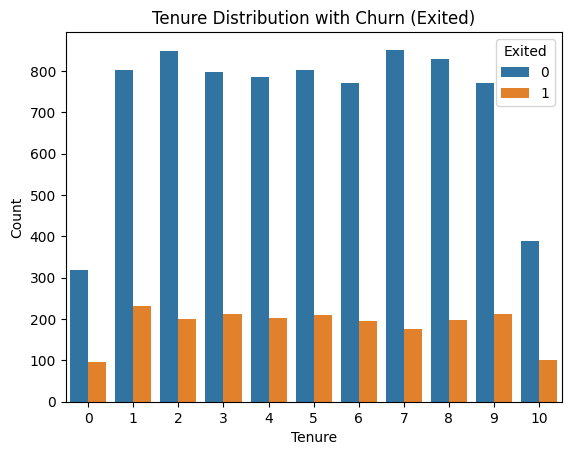

In [31]:
sns.countplot(data=df, x='Tenure', hue='Exited', order=sorted(df['Tenure'].unique()))
plt.title('Tenure Distribution with Churn (Exited)')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

In [32]:
# calculating churn rate based on Geography:
churn_by_geography = df.groupby('Geography')['Exited'].mean() * 100
churn_by_geography

Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

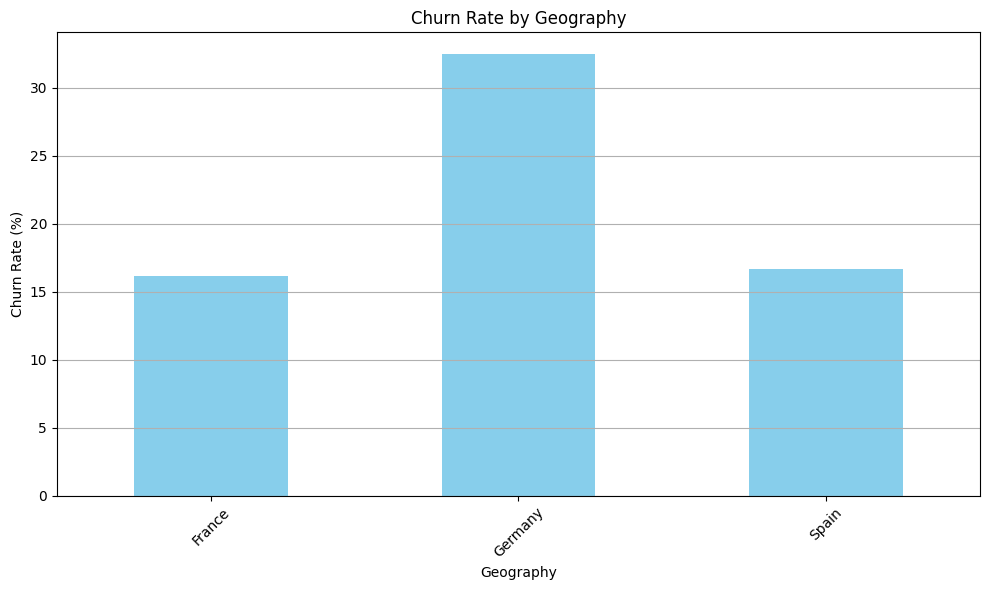

In [33]:
# Create a bar graph
plt.figure(figsize=(10, 6))
churn_by_geography.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjusts the layout
plt.show()

In [34]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Age Group
[10, 20)      6.122449
[20, 30)      7.600503
[30, 40)     10.883571
[40, 50)     30.786860
[50, 60)     56.041427
[60, 70)     35.200000
[70, 80)     10.294118
[80, 90)      7.692308
[90, 100)     0.000000
Name: Exited, dtype: float64


/tmp/ipykernel_34726/3358676132.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_group = df.groupby('Age Group')['Exited'].mean() * 100


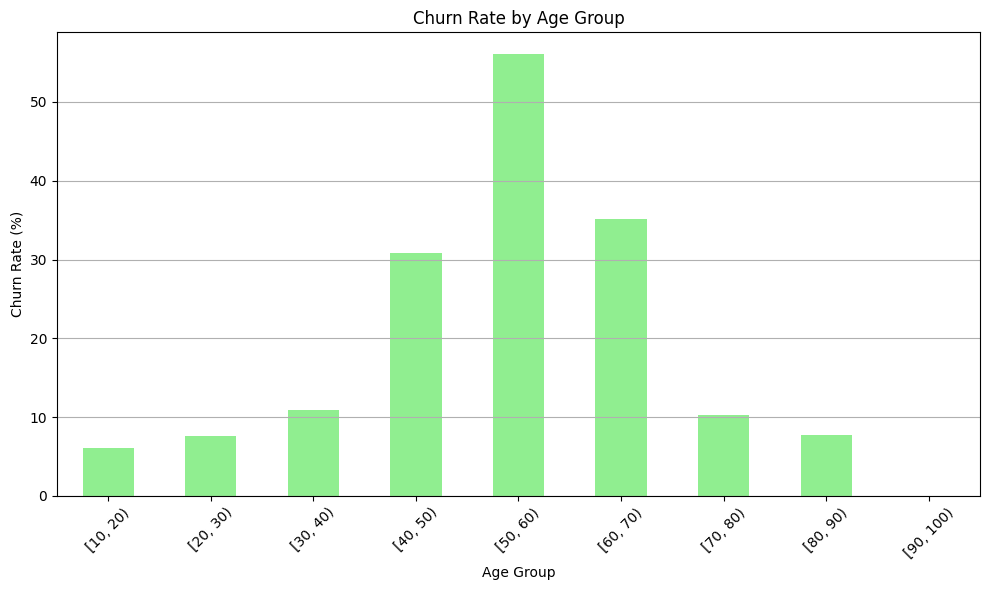

In [35]:

# Create age groups of 10 years
bins = range(10, 101, 10)  # Age groups: 10-19, 20-29, ..., 90-100
df['Age Group'] = pd.cut(df['Age'], bins=bins, right=False)

# Calculate churn rate by age group
churn_by_age_group = df.groupby('Age Group')['Exited'].mean() * 100

# Print the churn rates
print(churn_by_age_group)

# Create a bar graph for churn rate by age group
plt.figure(figsize=(10, 6))
churn_by_age_group.plot(kind='bar', color='lightgreen')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjusts the layout
plt.show()


Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64


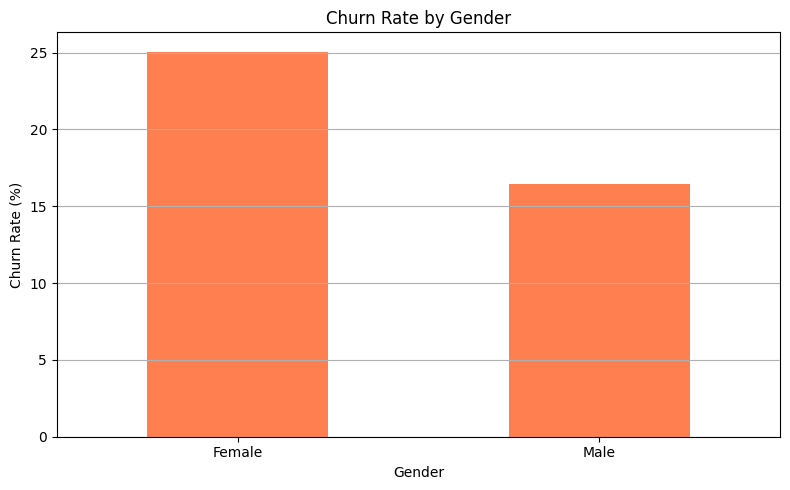

In [36]:
# Calculate churn rate by gender
churn_by_gender = df.groupby('Gender')['Exited'].mean() * 100

# Print the churn rates
print(churn_by_gender)

# Create a bar graph for churn rate by gender
plt.figure(figsize=(8, 5))
churn_by_gender.plot(kind='bar', color='coral')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()  # Adjusts the layout
plt.show()


### question 3

In [37]:
# Filter customers based on the given criteria
filtered_customers = df[
    (df['CreditScore'] > 500) & 
    (df['EstimatedSalary'] > 120000) & 
    (df['HasCrCard'] == 1) 
]

# Display the filtered results
filtered_customers.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,"[40, 50)"
20,15577657,McDonald,732,France,Male,41,8,0.00,2,1,1,170886.17,0,"[40, 50)"
21,15597945,Dellucci,636,Spain,Female,32,8,0.00,2,1,0,138555.46,0,"[30, 40)"
24,15625047,Yen,846,France,Female,38,5,0.00,1,1,1,187616.16,0,"[30, 40)"
26,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0,"[30, 40)"


In [38]:
filtered_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2589 entries, 5 to 9992
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       2589 non-null   int64   
 1   Surname          2589 non-null   object  
 2   CreditScore      2589 non-null   int64   
 3   Geography        2589 non-null   object  
 4   Gender           2589 non-null   object  
 5   Age              2589 non-null   int64   
 6   Tenure           2589 non-null   int64   
 7   Balance          2589 non-null   float64 
 8   NumOfProducts    2589 non-null   int64   
 9   HasCrCard        2589 non-null   int64   
 10  IsActiveMember   2589 non-null   int64   
 11  EstimatedSalary  2589 non-null   float64 
 12  Exited           2589 non-null   int64   
 13  Age Group        2589 non-null   category
dtypes: category(1), float64(2), int64(8), object(3)
memory usage: 286.1+ KB


In [39]:
from ydata_profiling import ProfileReport
prof = ProfileReport(filtered_customers)
prof.to_file(output_file='output2.html')

/usr/local/python/3.12.1/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 46.53it/s]
